In [32]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, SimpleRNN, LSTM, GRU, Flatten, GlobalMaxPool1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, SGD

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

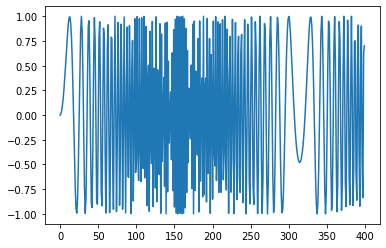

In [2]:
#lets make dataset
series = np.sin((0.1*np.arange(400))**2)
plt.plot(series)
plt.show()

In [3]:
#lets build dataset
T = 10 #time step in a sequence
D = 1 #number of feature
X = []
Y = []

for t in range(len(series)-T):
    x = series[t:t+T] #every 10 values
    X.append(x)

    y = series[t+T] #every 11th value
    Y.append(y)

#convert to array
X = np.array(X)
Y = np.array(Y)

#reshape
X.reshape(-1,T)

N = len(X)

### Autoregressive linear model

In [4]:
i = Input(shape=(T,))
x = Dense(1)(i)

model = Model(i,x)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10)]              0         
                                                                 
 dense (Dense)               (None, 1)                 11        
                                                                 
Total params: 11
Trainable params: 11
Non-trainable params: 0
_________________________________________________________________


In [5]:
model.compile(optimizer = Adam(learning_rate=0.1), loss= 'mse')
r = model.fit(X[:-N//2], Y[:-N//2], validation_data=(X[-N//2:], Y[-N//2:]), epochs=80)

Epoch 1/80
7/7 [==============================] - 1s 120ms/step - loss: 0.9930 - val_loss: 0.5961
Epoch 2/80
7/7 [==============================] - 0s 37ms/step - loss: 0.5422 - val_loss: 0.7566
Epoch 3/80
7/7 [==============================] - 0s 13ms/step - loss: 0.5768 - val_loss: 0.7016
Epoch 4/80
7/7 [==============================] - 0s 24ms/step - loss: 0.5371 - val_loss: 0.6522
Epoch 5/80
7/7 [==============================] - 0s 20ms/step - loss: 0.5183 - val_loss: 0.5318
Epoch 6/80
7/7 [==============================] - 0s 14ms/step - loss: 0.5328 - val_loss: 0.5754
Epoch 7/80
7/7 [==============================] - 0s 14ms/step - loss: 0.5335 - val_loss: 0.6273
Epoch 8/80
7/7 [==============================] - 0s 21ms/step - loss: 0.5237 - val_loss: 0.6048
Epoch 9/80
7/7 [==============================] - 0s 21ms/step - loss: 0.5576 - val_loss: 0.6026
Epoch 10/80
7/7 [==============================] - 0s 18ms/step - loss: 0.5928 - val_loss: 0.6380
Epoch 11/80
7/7 [===========

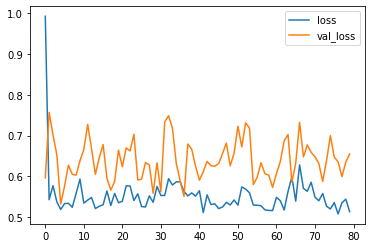

In [6]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

####Single step forecast using all data

13/13 [==============================] - 0s 3ms/step


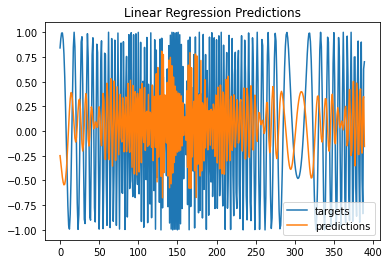

In [7]:
#use all data
outputs = model.predict(X)
predictions = outputs[:,0]

#plot
plt.plot(Y, label='targets')
plt.plot(predictions, label='predictions')
plt.title('Linear Regression Predictions')
plt.legend()
plt.show()

####Single step forecast using validation target

1/1 [==============================] - 0s 20ms/step


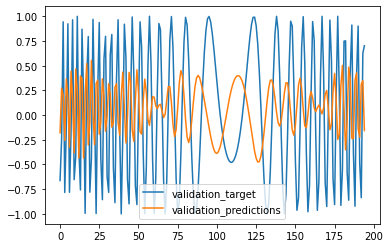

In [8]:
#Wrong way of forecasting

validation_target = Y[-N//2:]
validation_predictions = []

#index of first validation input
i = -N//2

while len(validation_predictions) < len(validation_target):
    p = model.predict(X[i].reshape(1,-1))[0,0]
    i += 1
    
    #update prediction list
    validation_predictions.append(p)

#plot
plt.plot(validation_target, label='validation_target')
plt.plot(validation_predictions, label='validation_predictions')
plt.legend()

####Multi step Prediction using validation target

1/1 [==============================] - 0s 23ms/step


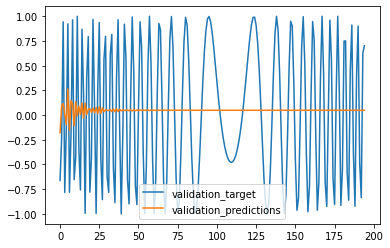

In [9]:
validation_target = Y[-N//2:]
validation_predictions = []
last_x = X[-N//2]

while len(validation_predictions) < len(validation_target):
    p = model.predict(last_x.reshape(1,-1))[0,0]
    
    validation_predictions.append(p)
    
    #make new input
    last_x = np.roll(last_x,-1)
    last_x[-1] = p

#plot
plt.plot(validation_target, label='validation_target')
plt.plot(validation_predictions, label='validation_predictions')
plt.legend()

Conclusion: Linear model does a terrible forecast

###SimpleRNN model

In [10]:
X = X.reshape(-1, T, 1) #X is NxT so, make it NxTxD

i = Input(shape=(T,D))
x = SimpleRNN(10)(i)
x = Dense(1)(x)

model = Model(i,x)

In [11]:
model.compile(optimizer=Adam(learning_rate=0.05), loss='mse')
r = model.fit(X[:-N//2], Y[:-N//2], validation_data=(X[-N//2:],Y[-N//2:]), epochs=200)

Epoch 1/200
7/7 [==============================] - 1s 43ms/step - loss: 0.5789 - val_loss: 0.6991
Epoch 2/200
7/7 [==============================] - 0s 10ms/step - loss: 0.5841 - val_loss: 0.6843
Epoch 3/200
7/7 [==============================] - 0s 8ms/step - loss: 0.5584 - val_loss: 0.6848
Epoch 4/200
7/7 [==============================] - 0s 9ms/step - loss: 0.5031 - val_loss: 0.5465
Epoch 5/200
7/7 [==============================] - 0s 9ms/step - loss: 0.4098 - val_loss: 0.4761
Epoch 6/200
7/7 [==============================] - 0s 10ms/step - loss: 0.3504 - val_loss: 0.3646
Epoch 7/200
7/7 [==============================] - 0s 9ms/step - loss: 0.2693 - val_loss: 0.4265
Epoch 8/200
7/7 [==============================] - 0s 13ms/step - loss: 0.2980 - val_loss: 0.1640
Epoch 9/200
7/7 [==============================] - 0s 10ms/step - loss: 0.2472 - val_loss: 0.2224
Epoch 10/200
7/7 [==============================] - 0s 10ms/step - loss: 0.1873 - val_loss: 0.1166
Epoch 11/200
7/7 [=====

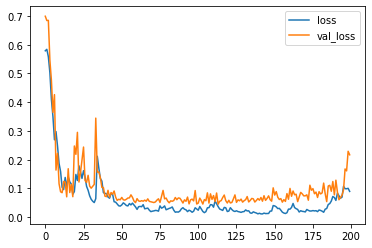

In [12]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

####Single step forecast using all data

13/13 [==============================] - 0s 3ms/step


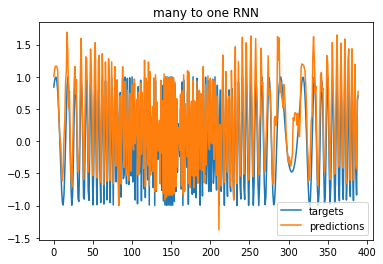

In [13]:
outputs = model.predict(X)
predictions = outputs[:,0]

#plot
plt.plot(Y, label='targets')
plt.plot(predictions,label ='predictions')
plt.title('many to one RNN')
plt.legend()
plt.show()

####Single step forecast using validation data

1/1 [==============================] - 0s 21ms/step


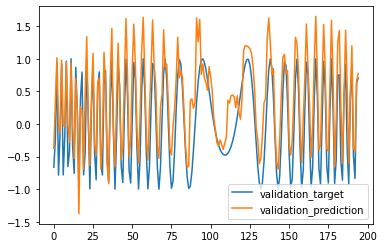

In [14]:
validation_target = Y[-N//2:]
validation_predictions = []

i = -N//2

while len(validation_predictions) < len(validation_target):
    p = model.predict(X[i].reshape(1,-1,1))[0,0]
    i += 1
    validation_predictions.append(p)

#plot
plt.plot(validation_target, label='validation_target')
plt.plot(validation_predictions, label='validation_prediction')
plt.legend()
plt.show()

####Multi Step Prediction

1/1 [==============================] - 0s 26ms/step


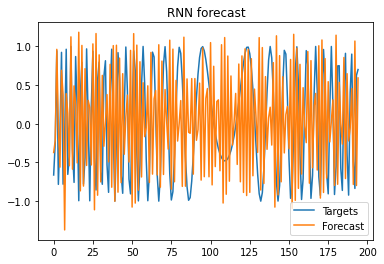

In [16]:
input_data = X[-N//2]
forecast = []

while len(forecast) < len(Y[-N//2:]):
     p = model.predict(input_data.reshape(1,T,1))[0,0] #reshape input to NxTxD
     forecast.append(p)

     input_data = np.roll(input_data,-1)
     input_data[-1] = p

plt.plot(Y[-N//2:], label='Targets')
plt.plot(forecast, label='Forecast')
plt.title('RNN forecast')
plt.legend()
plt.show()


###LSTM

In [42]:
X = X.reshape(-1, T, 1) #X is NxT so, make it NxTxD

i = Input(shape=(T,D))
x = LSTM(10)(i)
#x = LSTM(15, return_sequences=True)(i)
#x = LSTM(15, return_sequences=True)(x)
#x = GlobalMaxPool1D()(x)
x = Dense(1)(x)

model = Model(i,x)

In [43]:
model.compile(optimizer=Adam(learning_rate=0.05), loss='mse')
r = model.fit(X[:-N//2], Y[:-N//2], validation_data=(X[-N//2:],Y[-N//2:]), epochs=200)

Epoch 1/200
7/7 [==============================] - 3s 93ms/step - loss: 0.5357 - val_loss: 0.5556
Epoch 2/200
7/7 [==============================] - 0s 13ms/step - loss: 0.5146 - val_loss: 0.5955
Epoch 3/200
7/7 [==============================] - 0s 13ms/step - loss: 0.4531 - val_loss: 0.5274
Epoch 4/200
7/7 [==============================] - 0s 11ms/step - loss: 0.4065 - val_loss: 0.5009
Epoch 5/200
7/7 [==============================] - 0s 12ms/step - loss: 0.2899 - val_loss: 0.3298
Epoch 6/200
7/7 [==============================] - 0s 12ms/step - loss: 0.2144 - val_loss: 0.2575
Epoch 7/200
7/7 [==============================] - 0s 12ms/step - loss: 0.1425 - val_loss: 0.2095
Epoch 8/200
7/7 [==============================] - 0s 11ms/step - loss: 0.0979 - val_loss: 0.1764
Epoch 9/200
7/7 [==============================] - 0s 12ms/step - loss: 0.0597 - val_loss: 0.1614
Epoch 10/200
7/7 [==============================] - 0s 12ms/step - loss: 0.0465 - val_loss: 0.1354
Epoch 11/200
7/7 [=

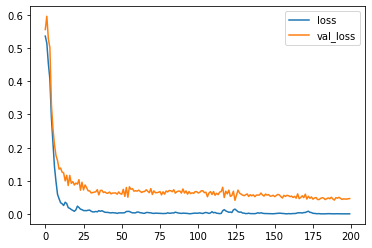

In [44]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

####Single step forecast using all data

13/13 [==============================] - 0s 2ms/step


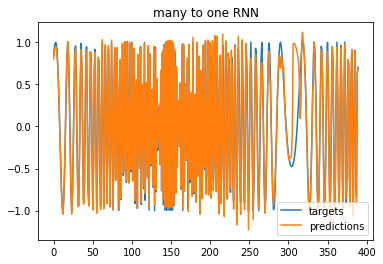

In [20]:
outputs = model.predict(X)
predictions = outputs[:,0]

#plot
plt.plot(Y, label='targets')
plt.plot(predictions,label ='predictions')
plt.title('many to one RNN')
plt.legend()
plt.show()

####single step forecast using validation data

1/1 [==============================] - 0s 23ms/step


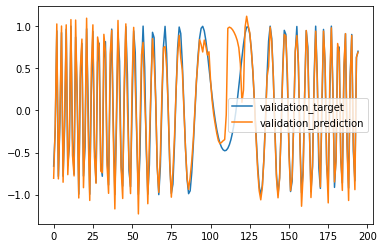

In [21]:
validation_target = Y[-N//2:]
validation_predictions = []

i = -N//2

while len(validation_predictions) < len(validation_target):
    p = model.predict(X[i].reshape(1,-1,1))[0,0]
    i += 1
    validation_predictions.append(p)

#plot
plt.plot(validation_target, label='validation_target')
plt.plot(validation_predictions, label='validation_prediction')
plt.legend()
plt.show()

####Multi Step Prediction

1/1 [==============================] - 0s 25ms/step


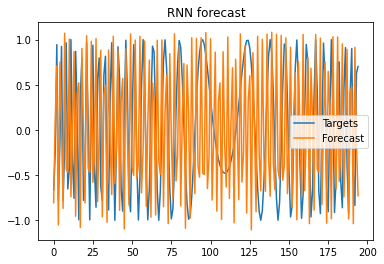

In [22]:
input_data = X[-N//2]
forecast = []

while len(forecast) < len(Y[-N//2:]):
     p = model.predict(input_data.reshape(1,T,1))[0,0] #reshape input to NxTxD
     forecast.append(p)

     input_data = np.roll(input_data,-1)
     input_data[-1] = p

plt.plot(Y[-N//2:], label='Targets')
plt.plot(forecast, label='Forecast')
plt.title('RNN forecast')
plt.legend()
plt.show()


Conclusion: LSTM is also not the best RNN

### GRU

In [24]:
X = X.reshape(-1, T, 1) #X is NxT so, make it NxTxD

i = Input(shape=(T,D))
x = GRU(10)(i)
x = Dense(1)(x)

model = Model(i,x)

In [25]:
model.compile(optimizer=Adam(learning_rate=0.05), loss='mse')
r = model.fit(X[:-N//2], Y[:-N//2], validation_data=(X[-N//2:],Y[-N//2:]), epochs=400)

Epoch 1/400
7/7 [==============================] - 3s 86ms/step - loss: 0.5432 - val_loss: 0.6974
Epoch 2/400
7/7 [==============================] - 0s 14ms/step - loss: 0.5223 - val_loss: 0.6550
Epoch 3/400
7/7 [==============================] - 0s 13ms/step - loss: 0.4965 - val_loss: 0.5459
Epoch 4/400
7/7 [==============================] - 0s 14ms/step - loss: 0.5075 - val_loss: 0.5130
Epoch 5/400
7/7 [==============================] - 0s 12ms/step - loss: 0.5070 - val_loss: 0.5639
Epoch 6/400
7/7 [==============================] - 0s 12ms/step - loss: 0.5425 - val_loss: 0.6401
Epoch 7/400
7/7 [==============================] - 0s 12ms/step - loss: 0.5009 - val_loss: 0.5405
Epoch 8/400
7/7 [==============================] - 0s 12ms/step - loss: 0.4613 - val_loss: 0.5206
Epoch 9/400
7/7 [==============================] - 0s 12ms/step - loss: 0.3765 - val_loss: 0.3601
Epoch 10/400
7/7 [==============================] - 0s 12ms/step - loss: 0.2952 - val_loss: 0.4327
Epoch 11/400
7/7 [=

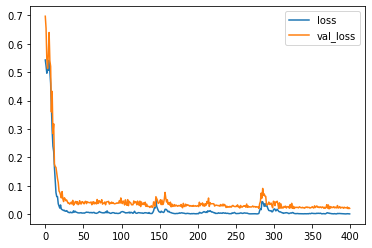

In [26]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

####Single step forecast using all data

13/13 [==============================] - 0s 2ms/step


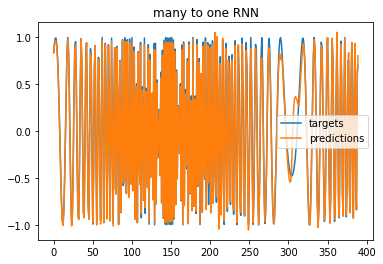

In [27]:
outputs = model.predict(X)
predictions = outputs[:,0]

#plot
plt.plot(Y, label='targets')
plt.plot(predictions,label ='predictions')
plt.title('many to one RNN')
plt.legend()
plt.show()

#### Single step forecast using validation data

1/1 [==============================] - 0s 21ms/step


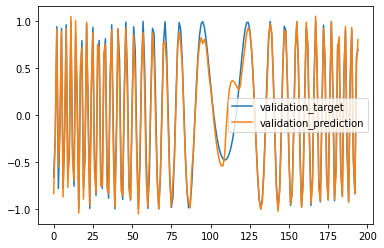

In [28]:
validation_target = Y[-N//2:]
validation_predictions = []

i = -N//2

while len(validation_predictions) < len(validation_target):
    p = model.predict(X[i].reshape(1,-1,1))[0,0]
    i += 1
    validation_predictions.append(p)

#plot
plt.plot(validation_target, label='validation_target')
plt.plot(validation_predictions, label='validation_prediction')
plt.legend()
plt.show()

####Multi step prediction

1/1 [==============================] - 0s 24ms/step


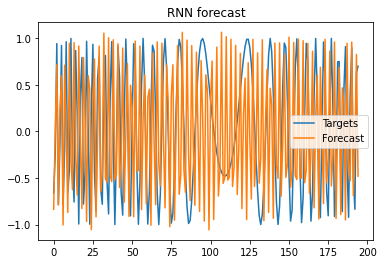

In [29]:
input_data = X[-N//2]
forecast = []

while len(forecast) < len(Y[-N//2:]):
     p = model.predict(input_data.reshape(1,T,1))[0,0] #reshape input to NxTxD
     forecast.append(p)

     input_data = np.roll(input_data,-1)
     input_data[-1] = p

plt.plot(Y[-N//2:], label='Targets')
plt.plot(forecast, label='Forecast')
plt.title('RNN forecast')
plt.legend()
plt.show()
